In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Calculer la vitesse

vitesses = [0, 5, 10, 15, 20, 30, 40, 60, 80, 120, 160, 220, 320, 440, 640, 880, 1280 ]
pression_dynamique_40 = [0, 0.04814, 0.19256, 0.43326, 0.77025, 1.73307, 3.08102, 6.93230, 12.3241, 27.7292, 49.2964, 93.2010, 197.185, 372.804, 788.742, 1491.21, 3154.97] # N/m2
pression_dynamique_altitude = [0.04814, 0.04158, 0.03597, 0.03117, 0.02705, 0.02351, 0.02047, 0.01784, 0.01572, 0.01386, 0.01222, 0.01077, 0.00958, 0.00852, 0.00756, 0.00670, 0.00594, 0.00525, 0.00464, 0.00409, 0.00360, 0.00316, 0.00278, 0.00244, 0.00213, 0.00186, 0.00162, 0.00141, 0.00123, 0.00107, 0.00092, 0.00080, 0.00068, 0.00056, 0.00043, 0.00031, 0.00019, 0.00007]




altitude: 60 km
hauteur acquise: 20 km
vitesse maxi: -489.6 m/s, -1763 km/h
distance parcourue: 42.1 km


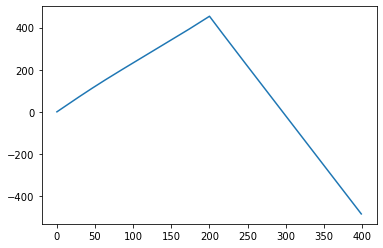

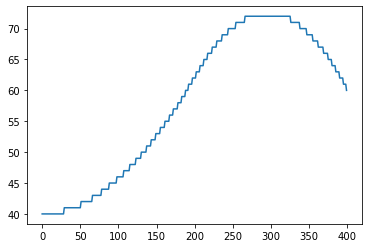

In [2]:
masse = 30000 * 9.81   # Masse du véhicule
force_moteur = 2112000 # Poussée moteur en Newton
duree_moteur = 200 # durée de fonctionnement du moteur en secondes
surf_eq = 1920 # m2
vitesse = 0
distance = 0
altitude = 40
pente_asc = 0.5
acc_resist_g = 9.81 * np.sin(pente_asc)
hauteur = 0
delta_t = 1
log_v = []
log_alt = []
for t in range(400):
    log_v.append(vitesse)
    pression_v = np.interp(vitesse, vitesses,pression_dynamique_40)
    if hauteur>=len(pression_dynamique_altitude)-1:
        if pente_asc!=0:
            force_moteur -= masse
        pente_asc = 0
        acc_resist_g = 0
    else:
        hauteur = np.around(np.sin(pente_asc)*distance/1000,0).astype(int)
    if t>=duree_moteur:
        force_moteur=0
        
    log_alt.append(altitude+hauteur)
    pression_v2 = pression_v*pression_dynamique_altitude[hauteur]/pression_dynamique_40[1]
    force_resist = pression_v2 * surf_eq
    force_result = force_moteur - force_resist
    acc = (force_result / masse) - acc_resist_g
    vitesse += acc*delta_t
    distance += vitesse * delta_t

print("altitude:", altitude+ hauteur,"km")
print("hauteur acquise:", hauteur,"km")
print("vitesse maxi:", np.around(vitesse,1),"m/s,",np.around(vitesse*3.6).astype(int),"km/h")
print("distance parcourue:",np.around(distance/1000,1),"km")
plt.plot(log_v)
_, ax = plt.subplots()
ax.plot(log_alt)

In [3]:
hauteur

20

In [4]:
pression_v = np.interp(vitesse, vitesses,pression_dynamique_40)
force_resist = pression_v * surf_eq
force_result = force_moteur - force_resist
acc = force_result / masse # Loi de Newton, 
print(acc)

0.0


In [5]:
acc_resist_g

4.703164533707231

In [6]:
np.interp(100, vitesses,pression_dynamique_40)

20.026649999999997

In [7]:
pente_asc = 0
acc_resist_g = 9.81 * np.sin(pente_asc)
print("--------------------------------")
print("force_resist_g",acc_resist_g)

--------------------------------
force_resist_g 0.0


In [8]:
180*np.arccos(90/np.sqrt(np.power(90,2)+np.power(30,2)))/np.pi

18.434948822922

In [9]:
2112000/2

1056000.0

In [10]:
2112000/9.81

215290.51987767583

In [11]:
masse

294300.0

In [12]:
force_moteur - masse

-294300.0